In [1]:
# 1. Khám phá dữ liệu lương Data Science

## Cài đặt các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Cấu hình biểu đồ đẹp hơn
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
sns.set_palette("viridis")

# Bỏ qua các cảnh báo
import warnings
warnings.filterwarnings('ignore')

In [5]:
## 1.1 Đọc dữ liệu
# Đọc dữ liệu từ file CSV
df = pd.read_csv('./datasets/ds_salaries/ds_salaries.csv')
# Hiển thị thông tin cơ bản về bộ dữ liệu
print(f"Kích thước dữ liệu: {df.shape}")
print("\nThông tin cơ bản về các cột:")
display(df.info())

print("\n5 dòng đầu tiên của dữ liệu:")
display(df.head())

Kích thước dữ liệu: (607, 12)

Thông tin cơ bản về các cột:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


None


5 dòng đầu tiên của dữ liệu:


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [6]:
## 1.2 Phân tích thống kê mô tả
# Thống kê mô tả cho các biến số
print("\nThống kê mô tả cho các biến số:")
display(df.describe())

# Thống kê mô tả cho các biến phân loại
print("\nThống kê mô tả cho các biến phân loại:")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}:")
    display(df[col].value_counts().head(10))



Thống kê mô tả cho các biến số:


,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000



Thống kê mô tả cho các biến phân loại:

experience_level:


experience_level
SE    280
MI    213
EN     88
EX     26
Name: count, dtype: int64


employment_type:


employment_type
FT    588
PT     10
CT      5
FL      4
Name: count, dtype: int64


job_title:


job_title
Data Scientist                143
Data Engineer                 132
Data Analyst                   97
Machine Learning Engineer      41
Research Scientist             16
Data Science Manager           12
Data Architect                 11
Big Data Engineer               8
Machine Learning Scientist      8
Principal Data Scientist        7
Name: count, dtype: int64


salary_currency:


salary_currency
USD    398
EUR     95
GBP     44
INR     27
CAD     18
JPY      3
PLN      3
TRY      3
CNY      2
MXN      2
Name: count, dtype: int64


employee_residence:


employee_residence
US    332
GB     44
IN     30
CA     29
DE     25
FR     18
ES     15
GR     13
JP      7
PT      6
Name: count, dtype: int64


company_location:


company_location
US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
NL      4
Name: count, dtype: int64


company_size:


company_size
M    326
L    198
S     83
Name: count, dtype: int64

In [7]:
## 1.3 Kiểm tra giá trị thiếu
# Kiểm tra giá trị thiếu trong dữ liệu
print("\nKiểm tra giá trị thiếu:")
display(df.isnull().sum())



Kiểm tra giá trị thiếu:


Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

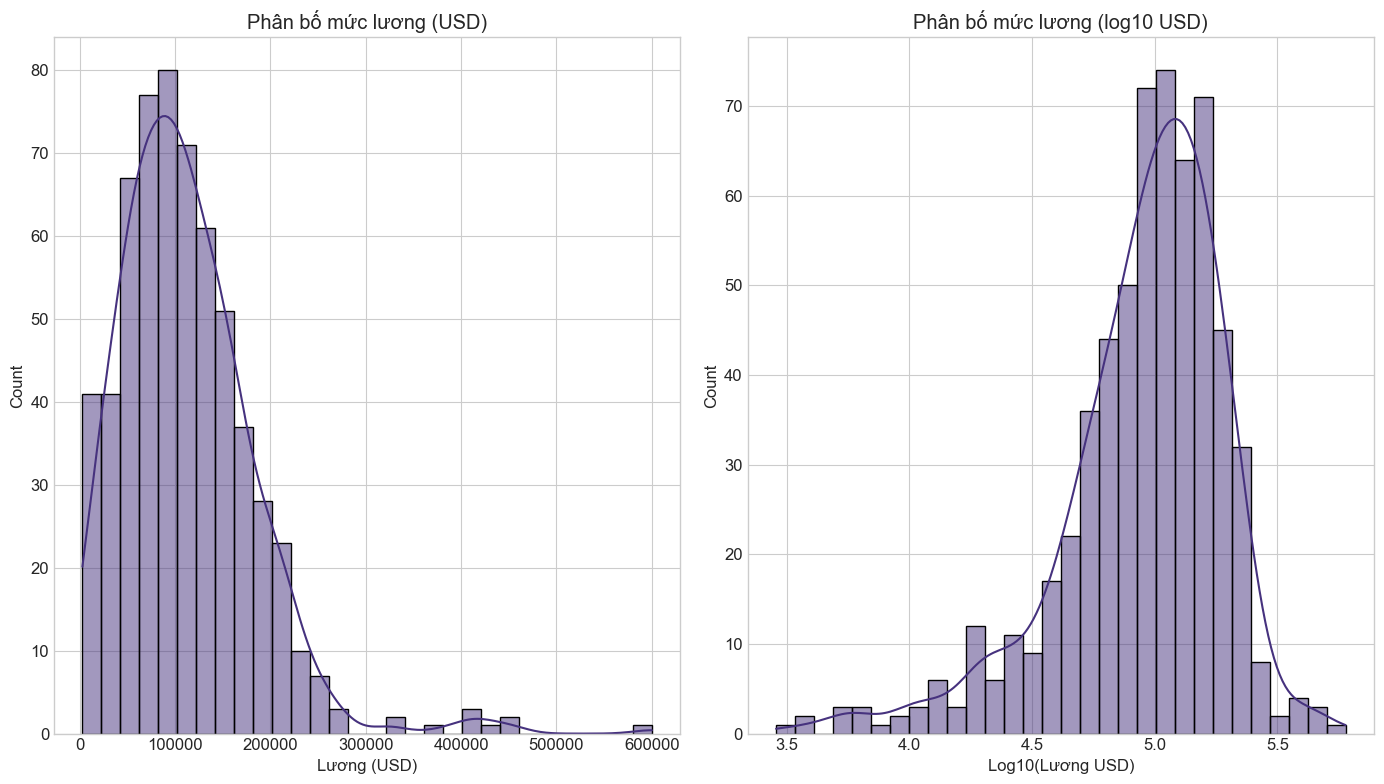

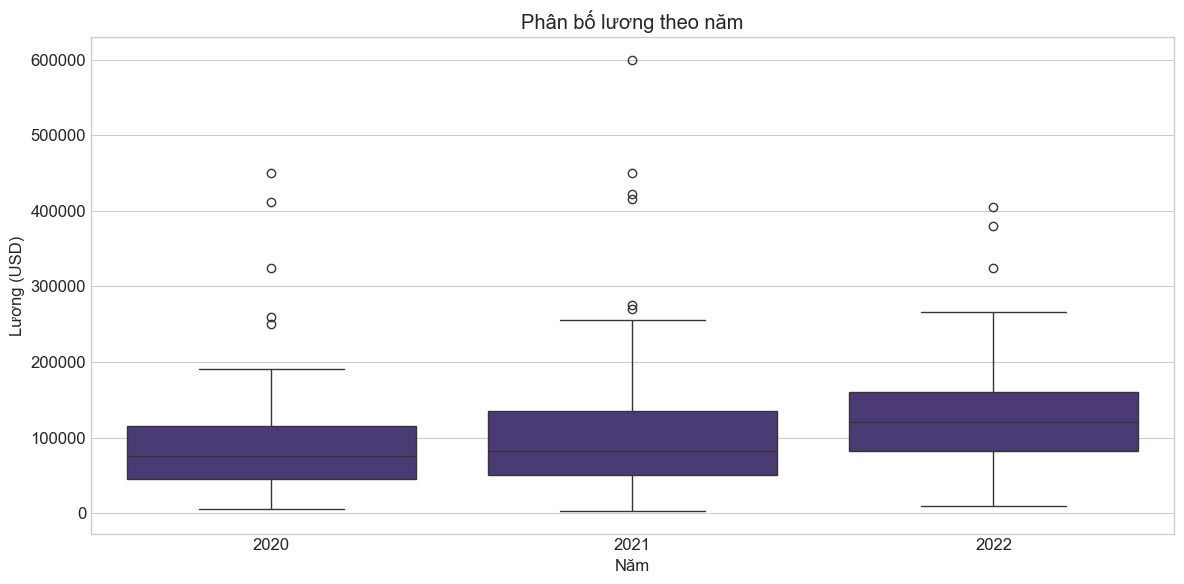

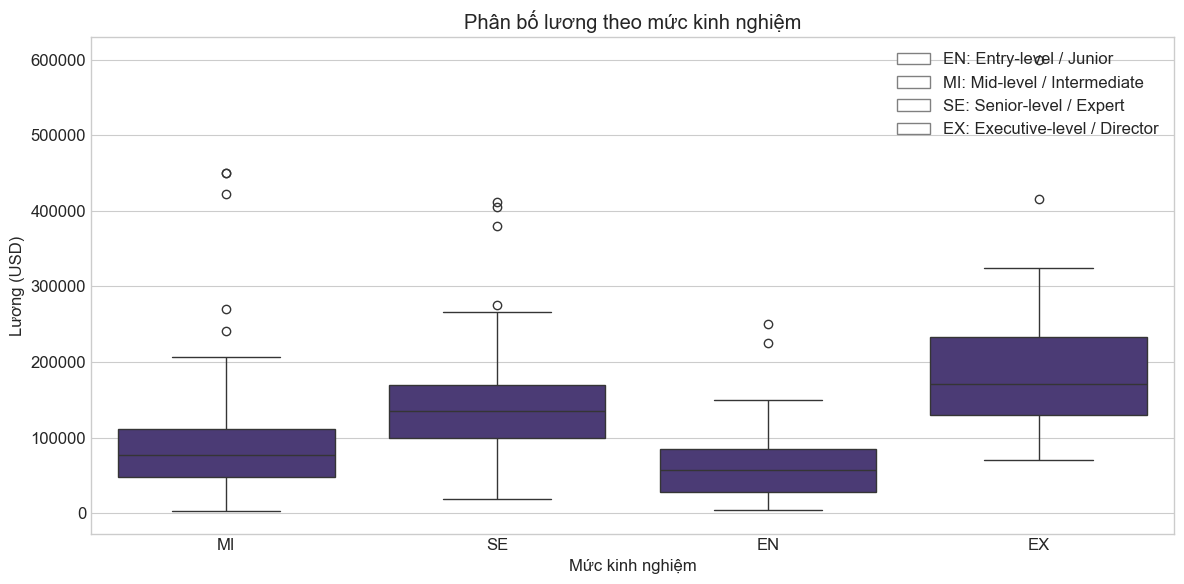

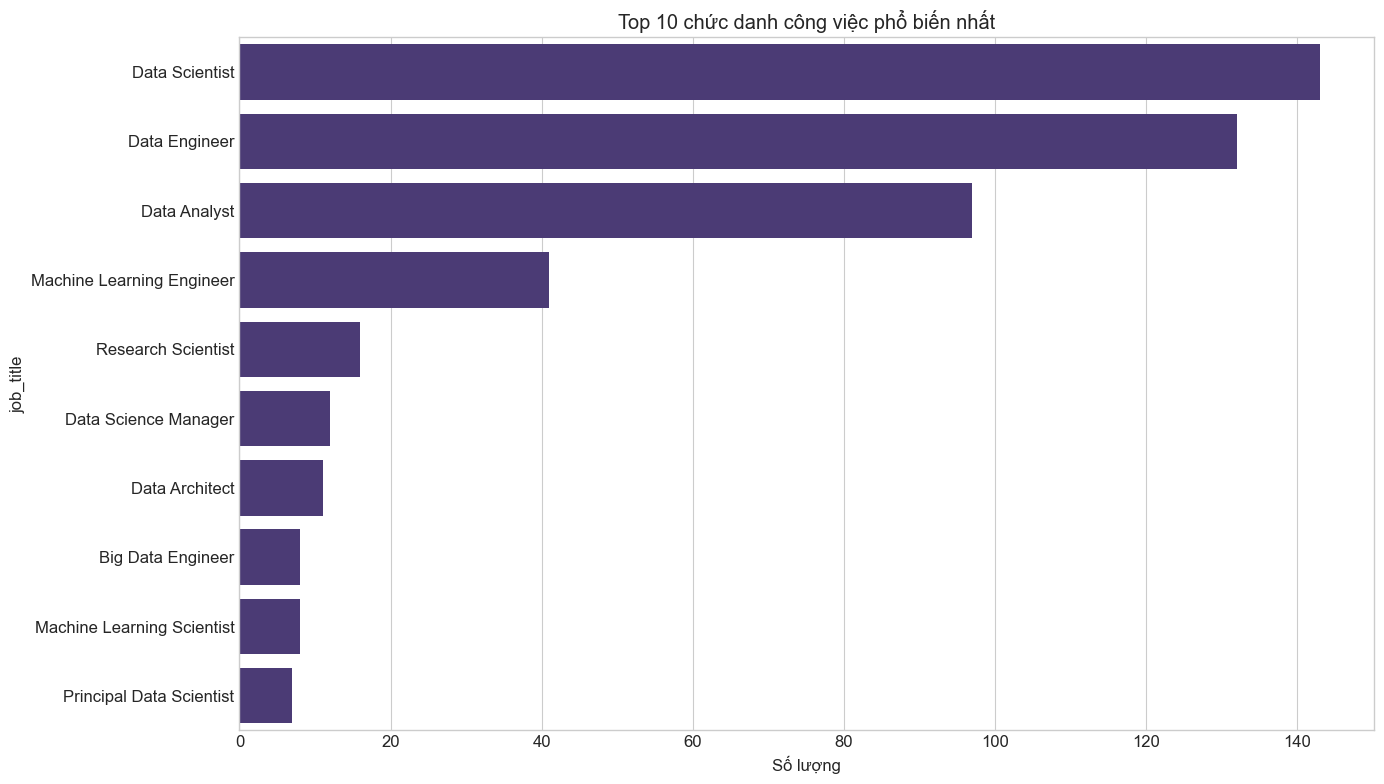

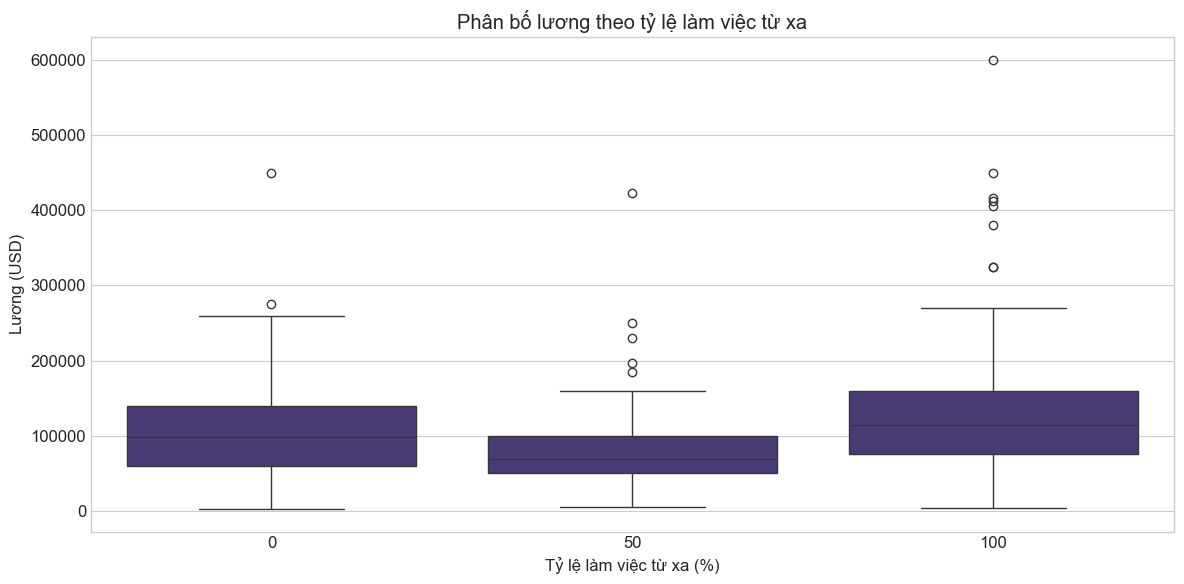

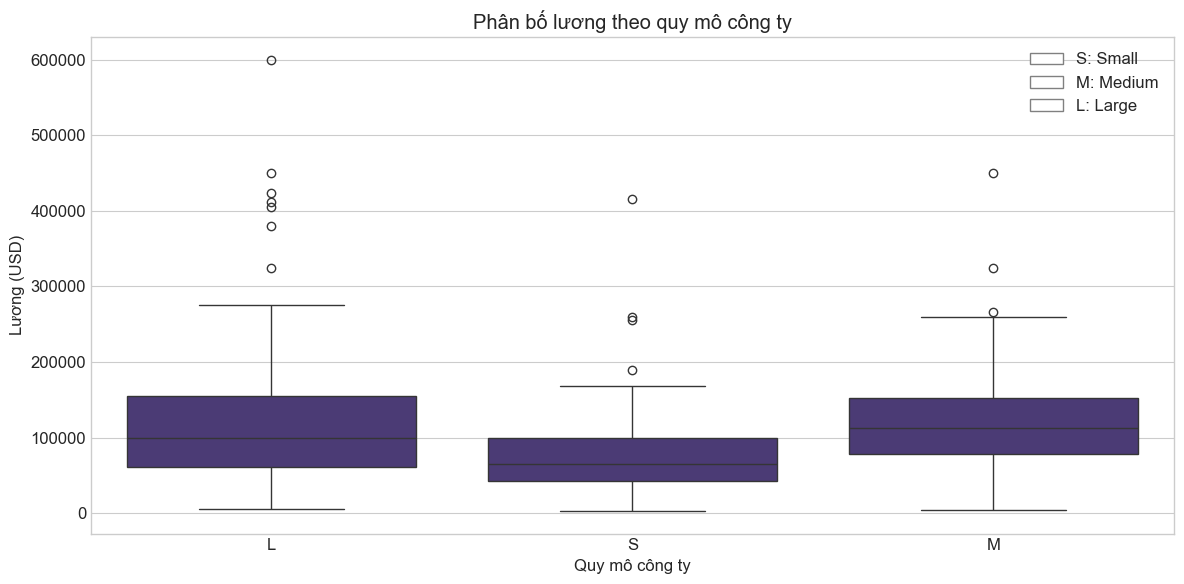

In [8]:
## 1.4 Khám phá các biến chính

# 1.4.1 Phân bố của mức lương
plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)
sns.histplot(df['salary_in_usd'], bins=30, kde=True)
plt.title('Phân bố mức lương (USD)')
plt.xlabel('Lương (USD)')

plt.subplot(1, 2, 2)
sns.histplot(np.log10(df['salary_in_usd']), bins=30, kde=True)
plt.title('Phân bố mức lương (log10 USD)')
plt.xlabel('Log10(Lương USD)')

plt.tight_layout()
plt.show()

# 1.4.2 Phân bố lương theo năm
plt.figure(figsize=(12, 6))
sns.boxplot(x='work_year', y='salary_in_usd', data=df)
plt.title('Phân bố lương theo năm')
plt.xlabel('Năm')
plt.ylabel('Lương (USD)')
plt.tight_layout()
plt.show()

# 1.4.3 Phân bố lương theo mức kinh nghiệm
plt.figure(figsize=(12, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df)
plt.title('Phân bố lương theo mức kinh nghiệm')
plt.xlabel('Mức kinh nghiệm')
plt.ylabel('Lương (USD)')

# Thêm chú thích về các mức kinh nghiệm
experience_dict = {
    'EN': 'Entry-level / Junior',
    'MI': 'Mid-level / Intermediate',
    'SE': 'Senior-level / Expert',
    'EX': 'Executive-level / Director'
}

# Tạo chú thích
handles = [plt.Rectangle((0,0),1,1, color='white', ec='gray') for _ in experience_dict]
labels = [f"{key}: {value}" for key, value in experience_dict.items()]

plt.legend(handles, labels, loc='upper right')
plt.tight_layout()
plt.show()

# 1.4.4 Top 10 chức danh công việc phổ biến nhất
plt.figure(figsize=(14, 8))
job_counts = df['job_title'].value_counts().head(10)
sns.barplot(x=job_counts.values, y=job_counts.index)
plt.title('Top 10 chức danh công việc phổ biến nhất')
plt.xlabel('Số lượng')
plt.tight_layout()
plt.show()

# 1.4.5 Phân bố lương theo loại hình làm việc từ xa
plt.figure(figsize=(12, 6))
sns.boxplot(x='remote_ratio', y='salary_in_usd', data=df)
plt.title('Phân bố lương theo tỷ lệ làm việc từ xa')
plt.xlabel('Tỷ lệ làm việc từ xa (%)')
plt.ylabel('Lương (USD)')
plt.tight_layout()
plt.show()

# 1.4.6 Phân bố lương theo quy mô công ty
plt.figure(figsize=(12, 6))
sns.boxplot(x='company_size', y='salary_in_usd', data=df)
plt.title('Phân bố lương theo quy mô công ty')
plt.xlabel('Quy mô công ty')
plt.ylabel('Lương (USD)')

# Thêm chú thích về quy mô công ty
company_size_dict = {
    'S': 'Small',
    'M': 'Medium',
    'L': 'Large'
}

# Tạo chú thích
handles = [plt.Rectangle((0,0),1,1, color='white', ec='gray') for _ in company_size_dict]
labels = [f"{key}: {value}" for key, value in company_size_dict.items()]

plt.legend(handles, labels, loc='upper right')
plt.tight_layout()
plt.show()



<Figure size 1200x600 with 0 Axes>

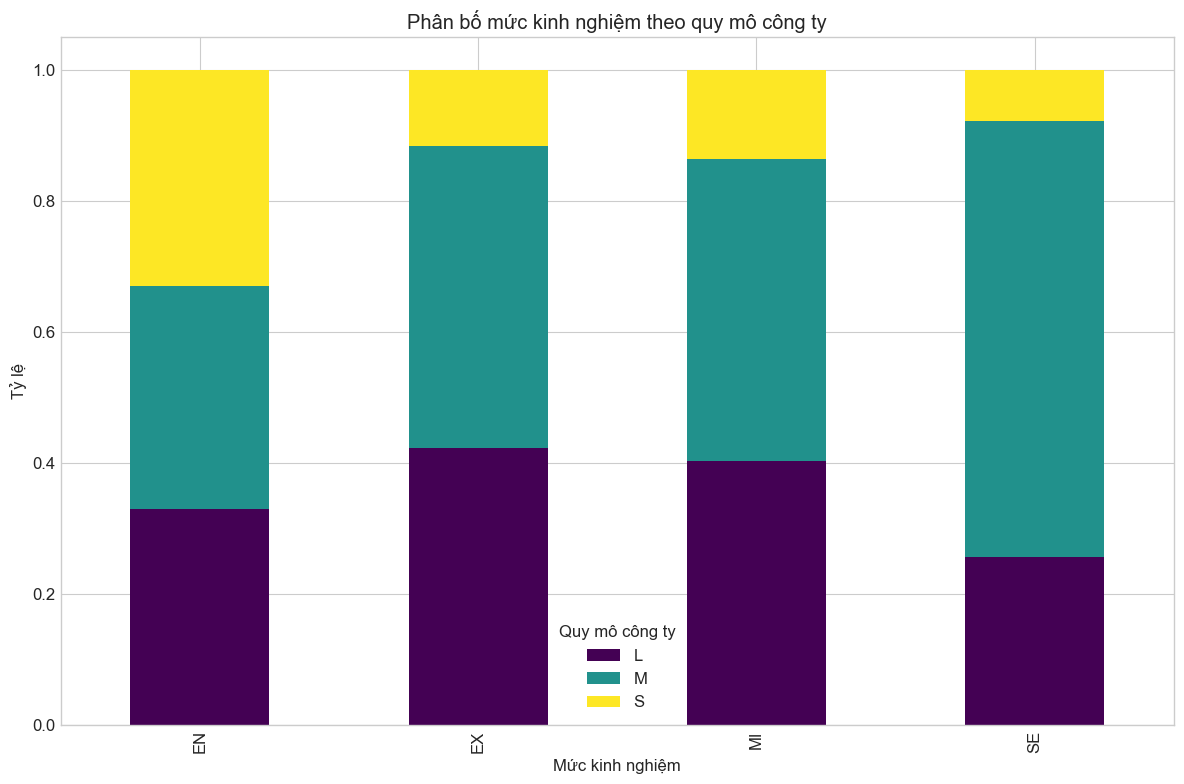

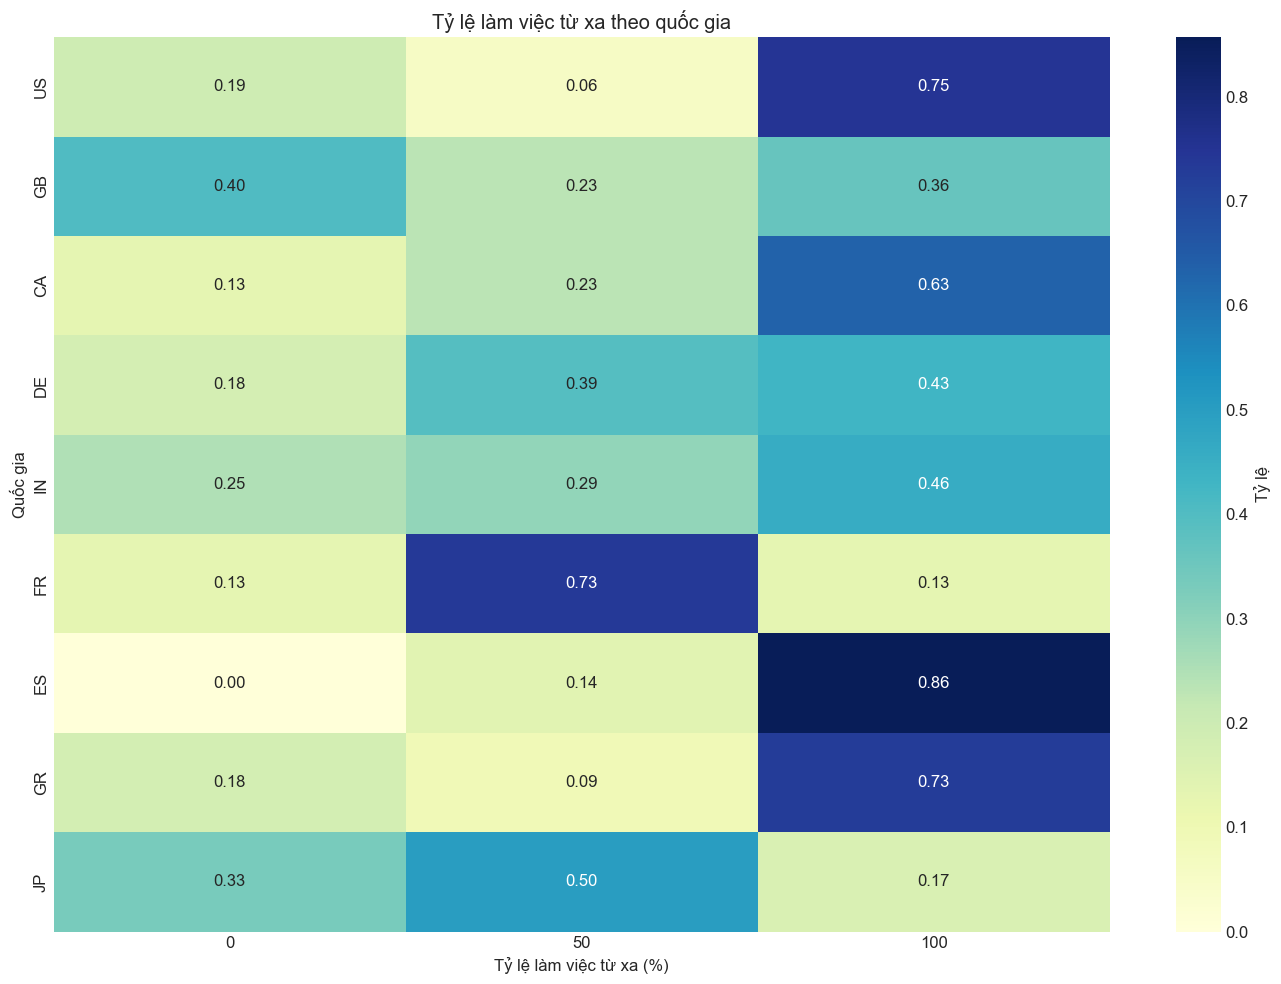

In [9]:
## 1.5 Mối quan hệ giữa các biến
# 1.5.1 Mối quan hệ giữa mức kinh nghiệm và quy mô công ty
plt.figure(figsize=(12, 6))
cross_tab = pd.crosstab(df['experience_level'], df['company_size'], normalize='index')
cross_tab.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Phân bố mức kinh nghiệm theo quy mô công ty')
plt.xlabel('Mức kinh nghiệm')
plt.ylabel('Tỷ lệ')
plt.legend(title='Quy mô công ty')
plt.tight_layout()
plt.show()

# 1.5.2 Heatmap về tỷ lệ làm việc từ xa theo quốc gia
plt.figure(figsize=(14, 10))
remote_country = pd.crosstab(df['company_location'], df['remote_ratio'])
remote_country_pct = remote_country.div(remote_country.sum(axis=1), axis=0)

# Lọc chỉ các quốc gia có ít nhất 5 bản ghi
country_counts = df['company_location'].value_counts()
countries_to_include = country_counts[country_counts >= 5].index
remote_country_pct_filtered = remote_country_pct.loc[countries_to_include]

sns.heatmap(remote_country_pct_filtered, annot=True, cmap='YlGnBu', fmt='.2f', cbar_kws={'label': 'Tỷ lệ'})
plt.title('Tỷ lệ làm việc từ xa theo quốc gia')
plt.xlabel('Tỷ lệ làm việc từ xa (%)')
plt.ylabel('Quốc gia')
plt.tight_layout()
plt.show()



In [11]:
## 1.6 Tổng kết và phát hiện chính
# Hiển thị một số thông tin tổng hợp

# Mức lương trung bình theo mức kinh nghiệm
exp_salary = df.groupby('experience_level')['salary_in_usd'].mean().sort_values(ascending=False)
print("\nMức lương trung bình theo mức kinh nghiệm:")
display(exp_salary)

# Mức lương trung bình theo quy mô công ty
size_salary = df.groupby('company_size')['salary_in_usd'].mean().sort_values(ascending=False)
print("\nMức lương trung bình theo quy mô công ty:")
display(size_salary)

# Mức lương trung bình theo năm
year_salary = df.groupby('work_year')['salary_in_usd'].mean()
print("\nMức lương trung bình theo năm:")
display(year_salary)

# Top 5 chức danh có mức lương cao nhất
top_salary_jobs = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(5)
print("\nTop 5 chức danh có mức lương cao nhất:")
display(top_salary_jobs)

# Top 5 quốc gia có mức lương cao nhất
top_salary_countries = df.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False).head(5)
print("\nTop 5 quốc gia có mức lương cao nhất:")
display(top_salary_countries)



Mức lương trung bình theo mức kinh nghiệm:


experience_level
EX    199392.038462
SE    138617.292857
MI     87996.056338
EN     61643.318182
Name: salary_in_usd, dtype: float64


Mức lương trung bình theo quy mô công ty:


company_size
L    119242.994949
M    116905.466258
S     77632.674699
Name: salary_in_usd, dtype: float64


Mức lương trung bình theo năm:


work_year
2020     95813.000000
2021     99853.792627
2022    124522.006289
Name: salary_in_usd, dtype: float64


Top 5 chức danh có mức lương cao nhất:


job_title
Data Analytics Lead         405000.000000
Principal Data Engineer     328333.333333
Financial Data Analyst      275000.000000
Principal Data Scientist    215242.428571
Director of Data Science    195074.000000
Name: salary_in_usd, dtype: float64


Top 5 quốc gia có mức lương cao nhất:


company_location
RU    157500.000000
US    144055.261972
NZ    125000.000000
IL    119059.000000
JP    114127.333333
Name: salary_in_usd, dtype: float64

In [12]:
print("\n=== Nhận xét và phát hiện chính ===")
print("1. Phân bố lương thể hiện sự chênh lệch lớn, với một số lượng nhỏ mức lương rất cao.")
print("2. Mức lương có xu hướng tăng theo cấp bậc kinh nghiệm, với mức Executive có lương cao nhất.")
print("3. Các công việc về AI và Machine Learning có xu hướng được trả lương cao hơn.")
print("4. Có sự khác biệt về mức lương giữa các quốc gia khác nhau.")
print("5. Quy mô công ty có ảnh hưởng đến mức lương, với công ty lớn thường trả lương cao hơn.")


=== Nhận xét và phát hiện chính ===
1. Phân bố lương thể hiện sự chênh lệch lớn, với một số lượng nhỏ mức lương rất cao.
2. Mức lương có xu hướng tăng theo cấp bậc kinh nghiệm, với mức Executive có lương cao nhất.
3. Các công việc về AI và Machine Learning có xu hướng được trả lương cao hơn.
4. Có sự khác biệt về mức lương giữa các quốc gia khác nhau.
5. Quy mô công ty có ảnh hưởng đến mức lương, với công ty lớn thường trả lương cao hơn.
